<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047>  ¿Cómo se mueve un péndulo? 

 </font> </center>



> Se dice que un sistema cualquiera, mecánico, eléctrico, neumático, etc., es un oscilador armónico si, cuando se deja en libertad fuera de su posición de equilibrio, vuelve hacia ella describiendo oscilaciones sinusoidales, o sinusoidales amortiguadas en torno a dicha posición estable.
- https://es.wikipedia.org/wiki/Oscilador_armónico

Referencias: 
   - http://matplotlib.org
   - https://seaborn.pydata.org
   - http://www.numpy.org
   - http://ipywidgets.readthedocs.io/en/latest/index.html

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('k5yTVHr6V14')

Los sistemas mas sencillos a estudiar en oscilaciones son el sistema ` masa-resorte` y el `péndulo simple`. 

<div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/76/Pendulum.jpg" width="150px" height="50px" />
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/ko/9/9f/Mass_spring.png" width="200px" height="100px" />
</div>

\begin{align}
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x &= 0, \quad \omega_{0} = \sqrt{\frac{k}{m}}\notag\\
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta &= 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l} 
\end{align} 

___
## Sistema `masa-resorte`

La solución a este sistema `masa-resorte` se explica en términos de la segunda ley de Newton. Para este caso, si la masa permanece constante y solo consideramos la dirección en $x$. Entonces,
\begin{equation}
F = m \frac{d^2x}{dt^2}.
\end{equation}

¿Cuál es la fuerza? **Ley de Hooke!**
\begin{equation}
F = -k x, \quad k > 0.
\end{equation}

Vemos que la fuerza se opone al desplazamiento y su intensidad es proporcional al mismo.  Y $k$ es la constante elástica o recuperadora del resorte. 

Entonces, un modelo del sistema `masa-resorte` está descrito por la siguiente **ecuación diferencial**:

\begin{equation}
\frac{d^2x}{dt^2} + \frac{k}{m}x = 0,
\end{equation}

cuya solución se escribe como 
\begin{equation}
x(t) = A \cos(\omega_{o} t) + B \sin(\omega_{o} t)
\end{equation}
Y su primera derivada (velocidad) sería 
\begin{equation}
\frac{dx(t)}{dt} = \omega_{0}[- A \sin(\omega_{0} t) + B\cos(\omega_{0}t)]
\end{equation}

<font color=red> Ver en el tablero que significa solución de la ecuación diferencial.</font>

### **¿Cómo se ven las gráficas de $x$ vs $t$ y $\frac{dx}{dt}$ vs $t$?** 

_Esta instrucción es para que las gráficas aparezcan dentro de este entorno._

In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
label_size=14
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

In [3]:
import numpy as np

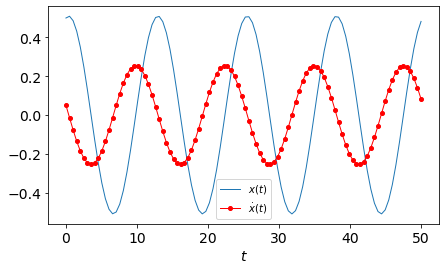

In [5]:
# Definición de funciones a graficar
A,B,w0 = 0.5,0.1,0.5

t = np.linspace(0,50,100)

#La solución de la eq diferencial del sistema
x = A*np.cos(w0*t) + B*np.sin(w0*t)

#La derivada de la posición (velocidad)
dx = w0*(-A*np.sin(w0*t) + B*np.cos(w0*t))

#Graficar las funciones
plt.figure(figsize=(7,4))
plt.plot(t,x,'-',lw=1,ms=1,label='$x(t)$')
plt.plot(t,dx,'ro-',lw=1,ms=4,label=r'$\dot{x}(t)$')
plt.legend(loc='best')
plt.xlabel('$t$', fontsize=14)
plt.show()

In [ ]:
# Colores, etiquetas y otros formatos


Y si consideramos un conjunto de frecuencias de oscilación, entonces 

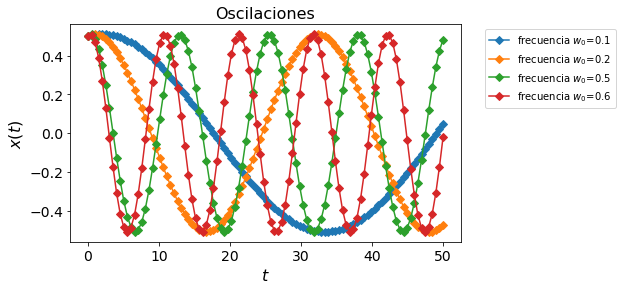

In [6]:
# Graficamos para cada frecuencia
#Vector de frecuencias
frequencias = np.array([0.1,0.2,0.5,0.6])

plt.figure(figsize=(7,4))
for w0 in frequencias:
    x = A*np.cos(w0*t) + B*np.sin(w0*t)
    plt.plot(t,x,'D-', label=f'frecuencia $w_0$={w0}')
plt.xlabel('$t$',fontsize=16)
plt.ylabel('$x(t)$',fontsize=16)
plt.title('Oscilaciones',fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1))
plt.show()

Si queremos manipular un poco mas las cosas, hacemos uso de lo siguiente:

In [7]:
from ipywidgets import *

In [8]:
#función masa resorte
def masa_resorte(t=0):
    A,B,w0=0.5,0.1,0.5
    x = A*np.cos(w0*t) + B*np.sin(w0*t)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,[0],'ko',ms=10)
    ax.set_xlim(xmin=-0.6, xmax=0.6)
    ax.axvline(x=0,color='r')
    ax.axhline(y=0,color='grey',lw=1)
    fig.canvas.draw()

In [9]:
interact(masa_resorte, t=(0,50,0.1))

interactive(children=(FloatSlider(value=0.0, description='t', max=50.0), Output()), _dom_classes=('widget-inte…

<function __main__.masa_resorte(t=0)>

La opción de arriba generalmente será lenta, así que lo recomendable es usar `interact_manual`. 

___
## Péndulo simple
Ahora, si fijamos nuestra atención al movimiento de un péndulo simple _(oscilaciones pequeñas)_, la ecuación diferencial a resolver tiene la misma forma:

\begin{equation}
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta = 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l}.
\end{equation}

La diferencia más evidente es como hemos definido a $\omega_{0}$. Esto quiere decir que, 

\begin{equation}
\theta(t) = A\cos(\omega_{0} t) + B\sin(\omega_{0}t)
\end{equation}

Si graficamos la ecuación de arriba vamos a encontrar un comportamiento muy similar al ya discutido anteriormente. Es por ello que ahora veremos el movimiento en el plano $xy$. Es decir, 

\begin{align}
x &= l \sin(\theta), \quad
y = l \cos(\theta) 
\end{align}

In [10]:
# Podemos definir una función que nos entregue theta dados los parámetros y el tiempo
def theta_t(a,b,g,l,t):
    omega_0 = np.sqrt(g/l)
    return a*np.cos(omega_0*t) + b*np.sin(omega_0*t)

In [17]:
# Hacemos un gráfico interactivo del péndulo
def pendulo_simple(t=0):
    fig = plt.figure(figsize=(5,5))
    ax=fig.add_subplot(1,1,1)
    l=2
    g=9.8
    
    #a=theta_0
    #b = dtheta_0/w0
    
    x=l*np.sin(theta_t(0.4,0.6,g,l,t))
    y=-l*np.cos(theta_t(0.4,0.6,g,l,t))
    
    ax.plot(x,y,'ko',ms=10)
    ax.plot([0],[0],'rD')
    ax.plot([0,x],[0,y],'k-',lw=1)
    ax.set_xlim(xmin=-2.2, xmax=2.2)
    ax.set_ylim(ymin=-2.2, ymax=0.2)
    fig.canvas.draw()

In [18]:
interact_manual(pendulo_simple, t=(0,10,0.01))

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.01), Button(description='Run In…

<function __main__.pendulo_simple(t=0)>


\begin{equation}
\theta(t) = A\cos(\omega_{0} t) + B\sin(\omega_{0}t)
\end{equation}

### Condiciones iniciales 

Realmente lo que se tiene que resolver es, 

\begin{equation}
\theta(t) = \theta(0) \cos(\omega_{0} t) + \frac{\dot{\theta}(0)}{\omega_{0}} \sin(\omega_{0} t)
\end{equation}

> **Actividad.** Modificar el programa anterior para incorporar las condiciones iniciales. 

In [20]:
def theta_t(a,b,g,l,t):
    omega_0 = np.sqrt(g/l)
    return a*np.cos(omega_0*t) + b*np.sin(omega_0*t)


In [25]:
def pendulo_simple(t=0):
    fig = plt.figure(figsize=(5,5))
    ax=fig.add_subplot(1,1,1)
    l=2
    g=9.8
    theta0 = np.pi/2
    dtheta0 = 0
    
    a = theta0
    b = dtheta0/w0
    
    x=l*np.sin(theta_t(a,b,g,l,t))
    y=-l*np.cos(theta_t(a,b,g,l,t))
    
    ax.plot(x,y,'ko',ms=10)
    ax.plot([0],[0],'rD')
    ax.plot([0,x],[0,y],'k-',lw=1)
    ax.set_xlim(xmin=-2.2, xmax=2.2)
    ax.set_ylim(ymin=-2.2, ymax=0.2)
    fig.canvas.draw()

In [26]:
interact_manual(pendulo_simple, t=(0,10,0.01))

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.01), Button(description='Run In…

<function __main__.pendulo_simple(t=0)>

### Plano fase  $(x, \frac{dx}{dt})$

La posición y velocidad para el sistema `masa-resorte` se escriben como: 

\begin{align}
x(t) &= x(0) \cos(\omega_{o} t) + \frac{\dot{x}(0)}{\omega_{0}} \sin(\omega_{o} t)\\
\dot{x}(t) &= -\omega_{0}x(0) \sin(\omega_{0} t) + \dot{x}(0)\cos(\omega_{0}t)]
\end{align}

#### Multiples condiciones iniciales

Trayectorias del oscilador armónico simple en el espacio fase $(x,\, \dot{x}\,/\omega_0)$ para diferentes valores de la energía. 